In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
import os
import sys
sys.path.append(os.path.realpath('..'))
from db_configuration.db_config import USERNAME,SERVER_NAME

In [2]:
sql_engine = create_engine(f"mssql+pymssql://{SERVER_NAME}/NhlRefStats")

In [3]:
ref_data = pd.read_sql("""
SELECT 
    Season_Str as Season,
    Referee,
    Number,
    Gms AS Games,
    [Goals/Gm] As [Goals/Game],
    [PP/Gm] AS [PP/Game],
    [PIM/Gm] AS [PIM/Game],
    [%Penl on Home] AS [Penalties on Home Team (%)],
    [Home Win %],
    [Gm to OT/SO],
    [PPOpp/gm],
    [% PP Opp for Hom],
    [Avg Pnl Diff],
    [Penl/gm],
    [Minor/gm],
    [Bench/gm],
    [Major/gm],
    [Misc/gm],
    [GM/gm]  
FROM [NhlRefStats].[dbo].[NHLRefCallsStats]
""", con = sql_engine)

In [4]:
# Initial cleanup
ref_data.set_index('Season', inplace = True)
ref_data.sort_index(inplace=True)
ref_data['Referee'] = ref_data['Referee'].str.strip()

In [5]:
ref_data.head()

,Referee,Number,Games,Goals/Game,PP/Game,PIM/Game,Penalties on Home Team (%),Home Win %,Gm to OT/SO,PPOpp/gm,% PP Opp for Hom,Avg Pnl Diff,Penl/gm,Minor/gm,Bench/gm,Major/gm,Misc/gm,GM/gm
Season,,,,,,,,,,,,,,,,,,
2014-15,"Sutherland, Kelly",11.0,11.0,5.1,3.1,7.2,0.49,0.45,0.27,NaN,NaN,NaN,3.4,3.2,NaN,NaN,NaN,NaN
2014-15,"Morton, Dean",36.0,13.0,5.1,3.4,10.6,0.48,0.54,0.15,NaN,NaN,NaN,4.6,4.1,NaN,NaN,NaN,NaN
2014-15,"Rehman, Kyle",37.0,13.0,5.0,3.9,13.4,0.52,0.85,0.23,NaN,NaN,NaN,5.0,4.1,NaN,NaN,NaN,NaN
2014-15,"St. Laurent, Francois",38.0,13.0,5.6,3.4,9.1,0.45,0.69,0.38,NaN,NaN,NaN,4.0,3.7,NaN,NaN,NaN,NaN
2014-15,"Romasko, Evgeny",39.0,2.0,2.0,3.3,10.0,0.35,1.00,0.50,NaN,NaN,NaN,4.3,3.5,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Top 10 Referee Average PIM/Game 2014-2023'}, xlabel='Referee', ylabel='Average PIM/Game'>

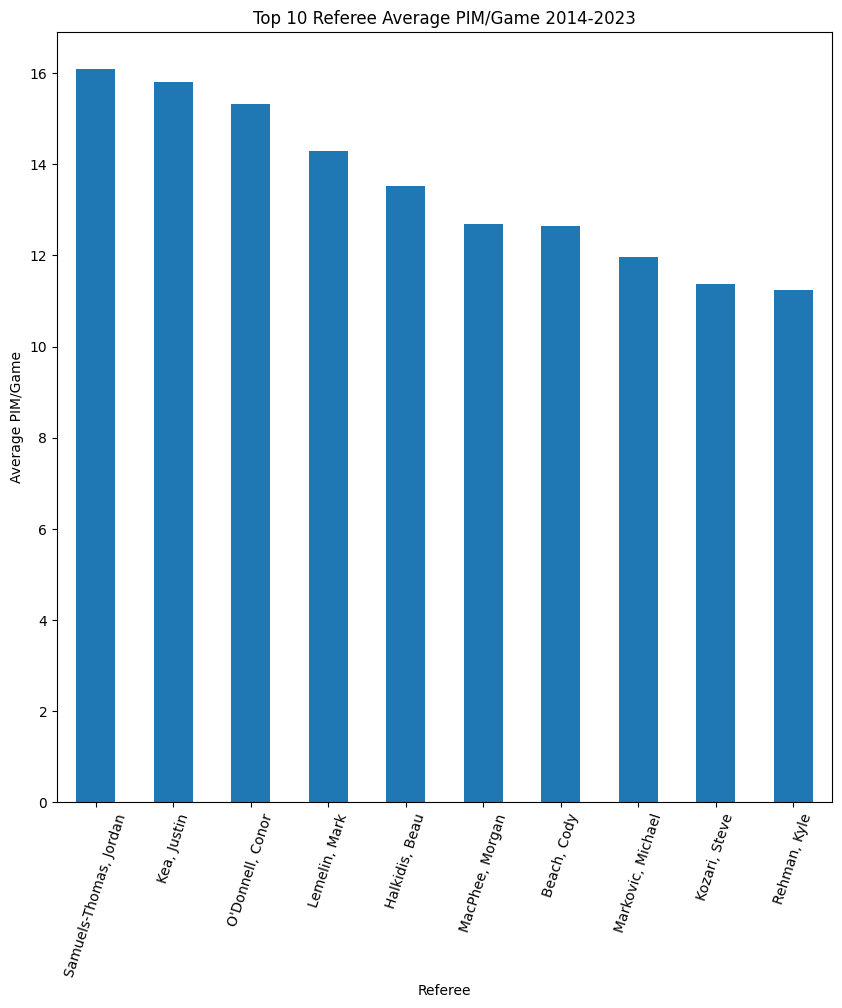

In [27]:
ref_data.groupby('Referee')['PIM/Game'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar', xlabel = 'Referee', ylabel = 'Average PIM/Game', 
                                                                                            title = 'Top 10 Referee Average PIM/Game 2014-2023', rot = 72, figsize = ((10,10))) 

<Axes: title={'center': 'Top 10 Referee Average Penalties Called Per Game 2014-2023'}, xlabel='Referee', ylabel='Average Number of Penalties Called'>

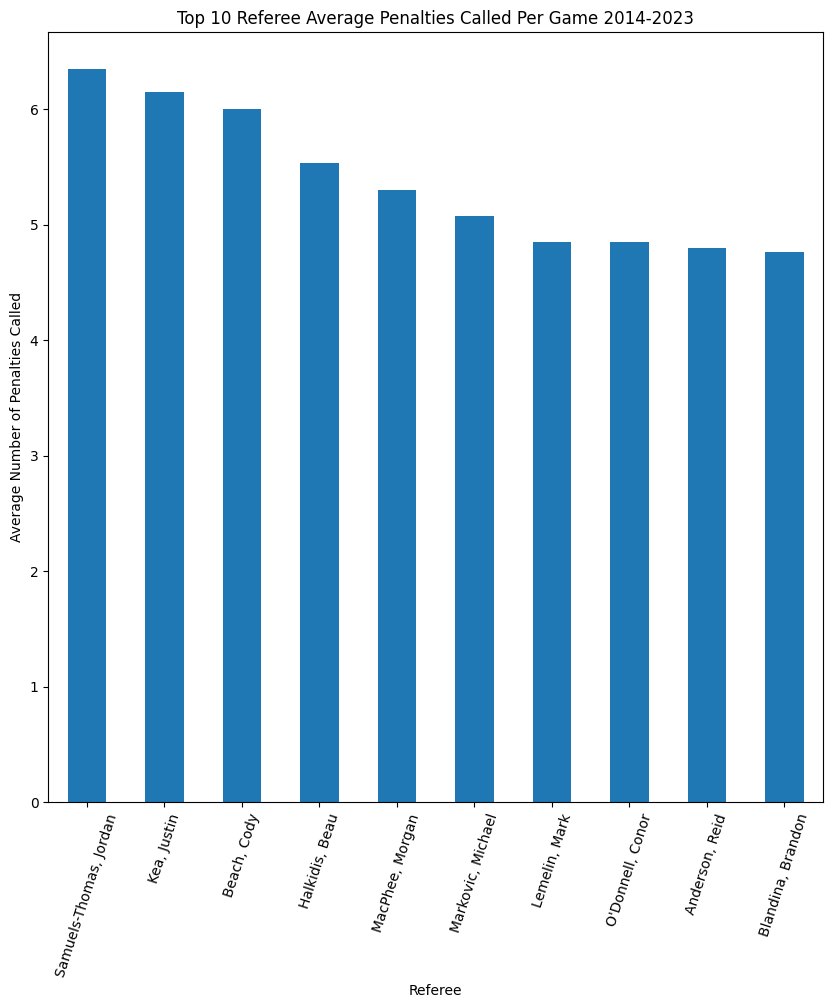

In [28]:
ref_data.groupby('Referee')['Penl/gm'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar', xlabel = 'Referee', ylabel = 'Average Number of Penalties Called', 
                                                                                            title = 'Top 10 Referee Average Penalties Called Per Game 2014-2023', rot = 72, figsize = ((10,10))) 